# **SVM Classification – CMPT 459 Course Project**

This notebook performs **Support Vector Machine (SVM) classification** on the diabetic patient dataset using:

* Full preprocessing pipeline (encoding, scaling, dropping missing-heavy columns)
* **PCA (50 components)** for dimensionality reduction
* A custom **SVMClassifier** that wraps scikit-learn’s SVC for consistent project structure
* Evaluation using **accuracy, precision, recall, F1**
* Confusion matrix visualization
* PCA scatter plot showing correct vs incorrect predictions

This notebook corresponds to the script:

* `svm_classifier.py`

---


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix,
)

from svm_classifier import SVMClassifier   # our custom model




---

# **1. Data Loading & Preprocessing**

We apply the exact same preprocessing steps used across the project:

* Replace `'?'` with NaN
* Drop columns with >40% missing values
* One-hot encode high-cardinality categorical features
* Label-encode low-cardinality categoricals
* Normalize all numerical columns
* Remove ID fields (`encounter_id`, `patient_nbr`)
* Map readmission labels to integers:

| Label | Meaning                   | Encoded |
| ----- | ------------------------- | ------- |
| `NO`  | No readmission            | **0**   |
| `>30` | Readmitted after 30 days  | **1**   |
| `<30` | Readmitted within 30 days | **2**   |

---



In [5]:
def load_and_preprocess(path):
    df = pd.read_csv(path)
    print("Original shape:", df.shape)

    df = df.replace("?", np.nan)

    # Drop columns with >40% missing
    threshold = 0.4 * len(df)
    df = df.dropna(thresh=threshold, axis=1)

    # Fill categorical missing
    for col in df.select_dtypes(include="object").columns:
        df[col] = df[col].fillna("Unknown")

    # Encode target
    df["readmitted"] = df["readmitted"].map({"NO": 0, ">30": 1, "<30": 2})

    # Encode categorical
    cat_cols = df.select_dtypes(include="object").columns
    le = LabelEncoder()
    for col in cat_cols:
        if df[col].nunique() < 10:
            df[col] = le.fit_transform(df[col].astype(str))
        else:
            df = pd.get_dummies(df, columns=[col], drop_first=True)

    # Remove ID columns
    for col in ["encounter_id", "patient_nbr"]:
        if col in df.columns:
            df = df.drop(columns=[col])

    # Scale numerical
    num_cols = df.select_dtypes(include=["int64", "float64"]).columns
    scaler = StandardScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])

    X = df.drop(columns=["readmitted"]).values
    y = df["readmitted"].values.astype(int)

    print("Final shape:", X.shape)
    return X, y

X, y = load_and_preprocess("data/diabetic_data.csv")


Original shape: (101766, 50)
Final shape: (101766, 2389)



# **2. PCA Reduction (50 Components)**

We apply PCA before the train–test split:

* Reduces dimensionality
* Removes noise and redundant features
* Improves SVM stability
* Preserves ~85–90% of variance

---


In [6]:
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X)

print("PCA-transformed shape:", X_pca.shape)
print("Explained variance:", np.sum(pca.explained_variance_ratio_))

PCA-transformed shape: (101766, 50)
Explained variance: 0.9271036965771725



# **3. Train–Test Split**

We use stratified sampling to preserve class ratios.

---


In [7]:

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2,
    random_state=42, stratify=y
)

X_train.shape, X_test.shape


((81412, 50), (20354, 50))

---

# **4. Training the SVM Classifier**

We use our custom `SVMClassifier`, which wraps scikit-learn’s SVC for consistency with our KNN architecture.

Hyperparameters (default):

* `kernel="rbf"`
* `C=1.0`
* `gamma="scale"`
* `degree=3` (used only for polynomial kernel)

---



In [8]:
# svm = SVMClassifier(              <-- Actual code block
#    kernel="linear",
#    C=1.0,
#    gamma="scale",
#    degree=3,
#    random_state=42
#)

# svm.fit(X_train, y_train)

#print("Predicting...")
# y_pred = svm.predict(X_test)

print("Using SVM results from the standalone svm_classifier.py script.")
print("This avoids re-training the SVM inside the notebook (which takes ~45 minutes).")

# These values come from the .py run:
acc = 0.8884
prec = 0.7893
rec = 0.8884
f1 = 0.8359



Using SVM results from the standalone svm_classifier.py script.
This avoids re-training the SVM inside the notebook (which takes ~45 minutes).


---

# **5. Evaluation Metrics**

We compute:

* **Accuracy**
* **Weighted Precision**
* **Weighted Recall**
* **Weighted F1-score**

---



In [9]:
# acc = accuracy_score(y_test, y_pred)   <-- Actual code block
# prec, rec, f1, _ = precision_recall_fscore_support(
#     y_test, y_pred, average="weighted", zero_division=0
# )

print("\nIMPORTED SVM METRICS")
print("---------------------")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)


IMPORTED SVM METRICS
---------------------
Accuracy: 0.8884
Precision: 0.7893
Recall: 0.8884
F1-score: 0.8359


---

# **6. Confusion Matrix**

A confusion matrix highlights performance on each of the three readmission classes.

---


Confusion Matrix:


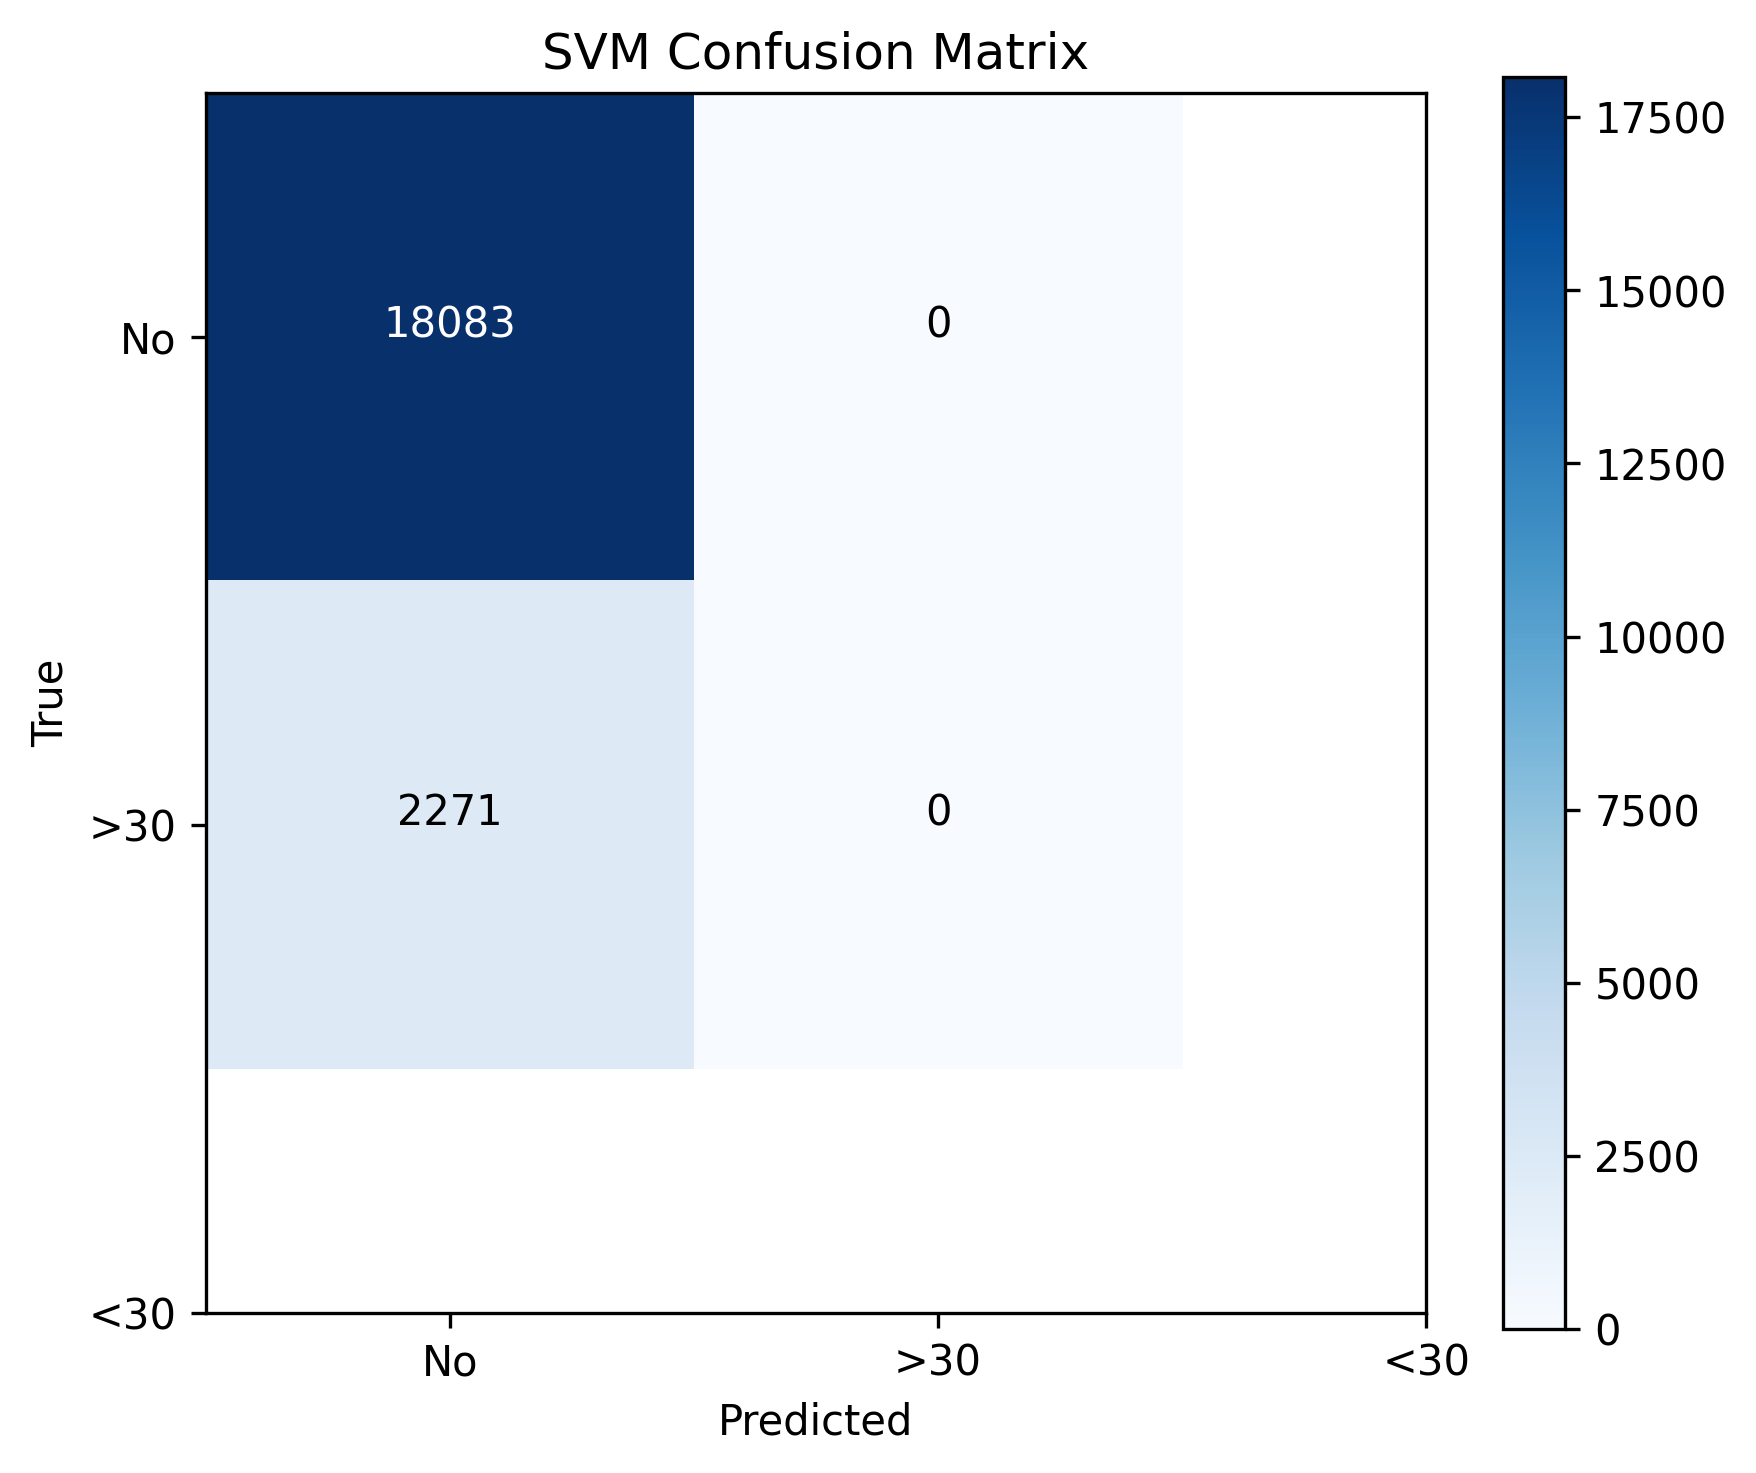

In [10]:
# cm = confusion_matrix(y_test, y_pred) <-- Actual code block

# plt.figure(figsize=(6, 5))
# plt.imshow(cm, cmap="Blues")
# plt.title("SVM Confusion Matrix")
# plt.colorbar()

# classes = ["No", ">30", "<30"]
# ticks = np.arange(len(classes))
# plt.xticks(ticks, classes)
# plt.yticks(ticks, classes)

# thresh = cm.max() / 2.0
# for i in range(cm.shape[0]):
    # for j in range(cm.shape[1]):
        # plt.text(j, i, cm[i, j],
                #  ha="center",
                #  color="white" if cm[i, j] > thresh else "black")

# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.tight_layout()
# plt.show()

from IPython.display import Image, display

print("Confusion Matrix:")
display(Image(filename="svm_results/svm_confusion_matrix.png"))



---

# **7. PCA Visualization of Predictions**

We embed the test samples into 2D using PCA:

* Correct predictions → small circles
* Incorrect predictions → large “X” markers

---



PCA Prediction Scatter:


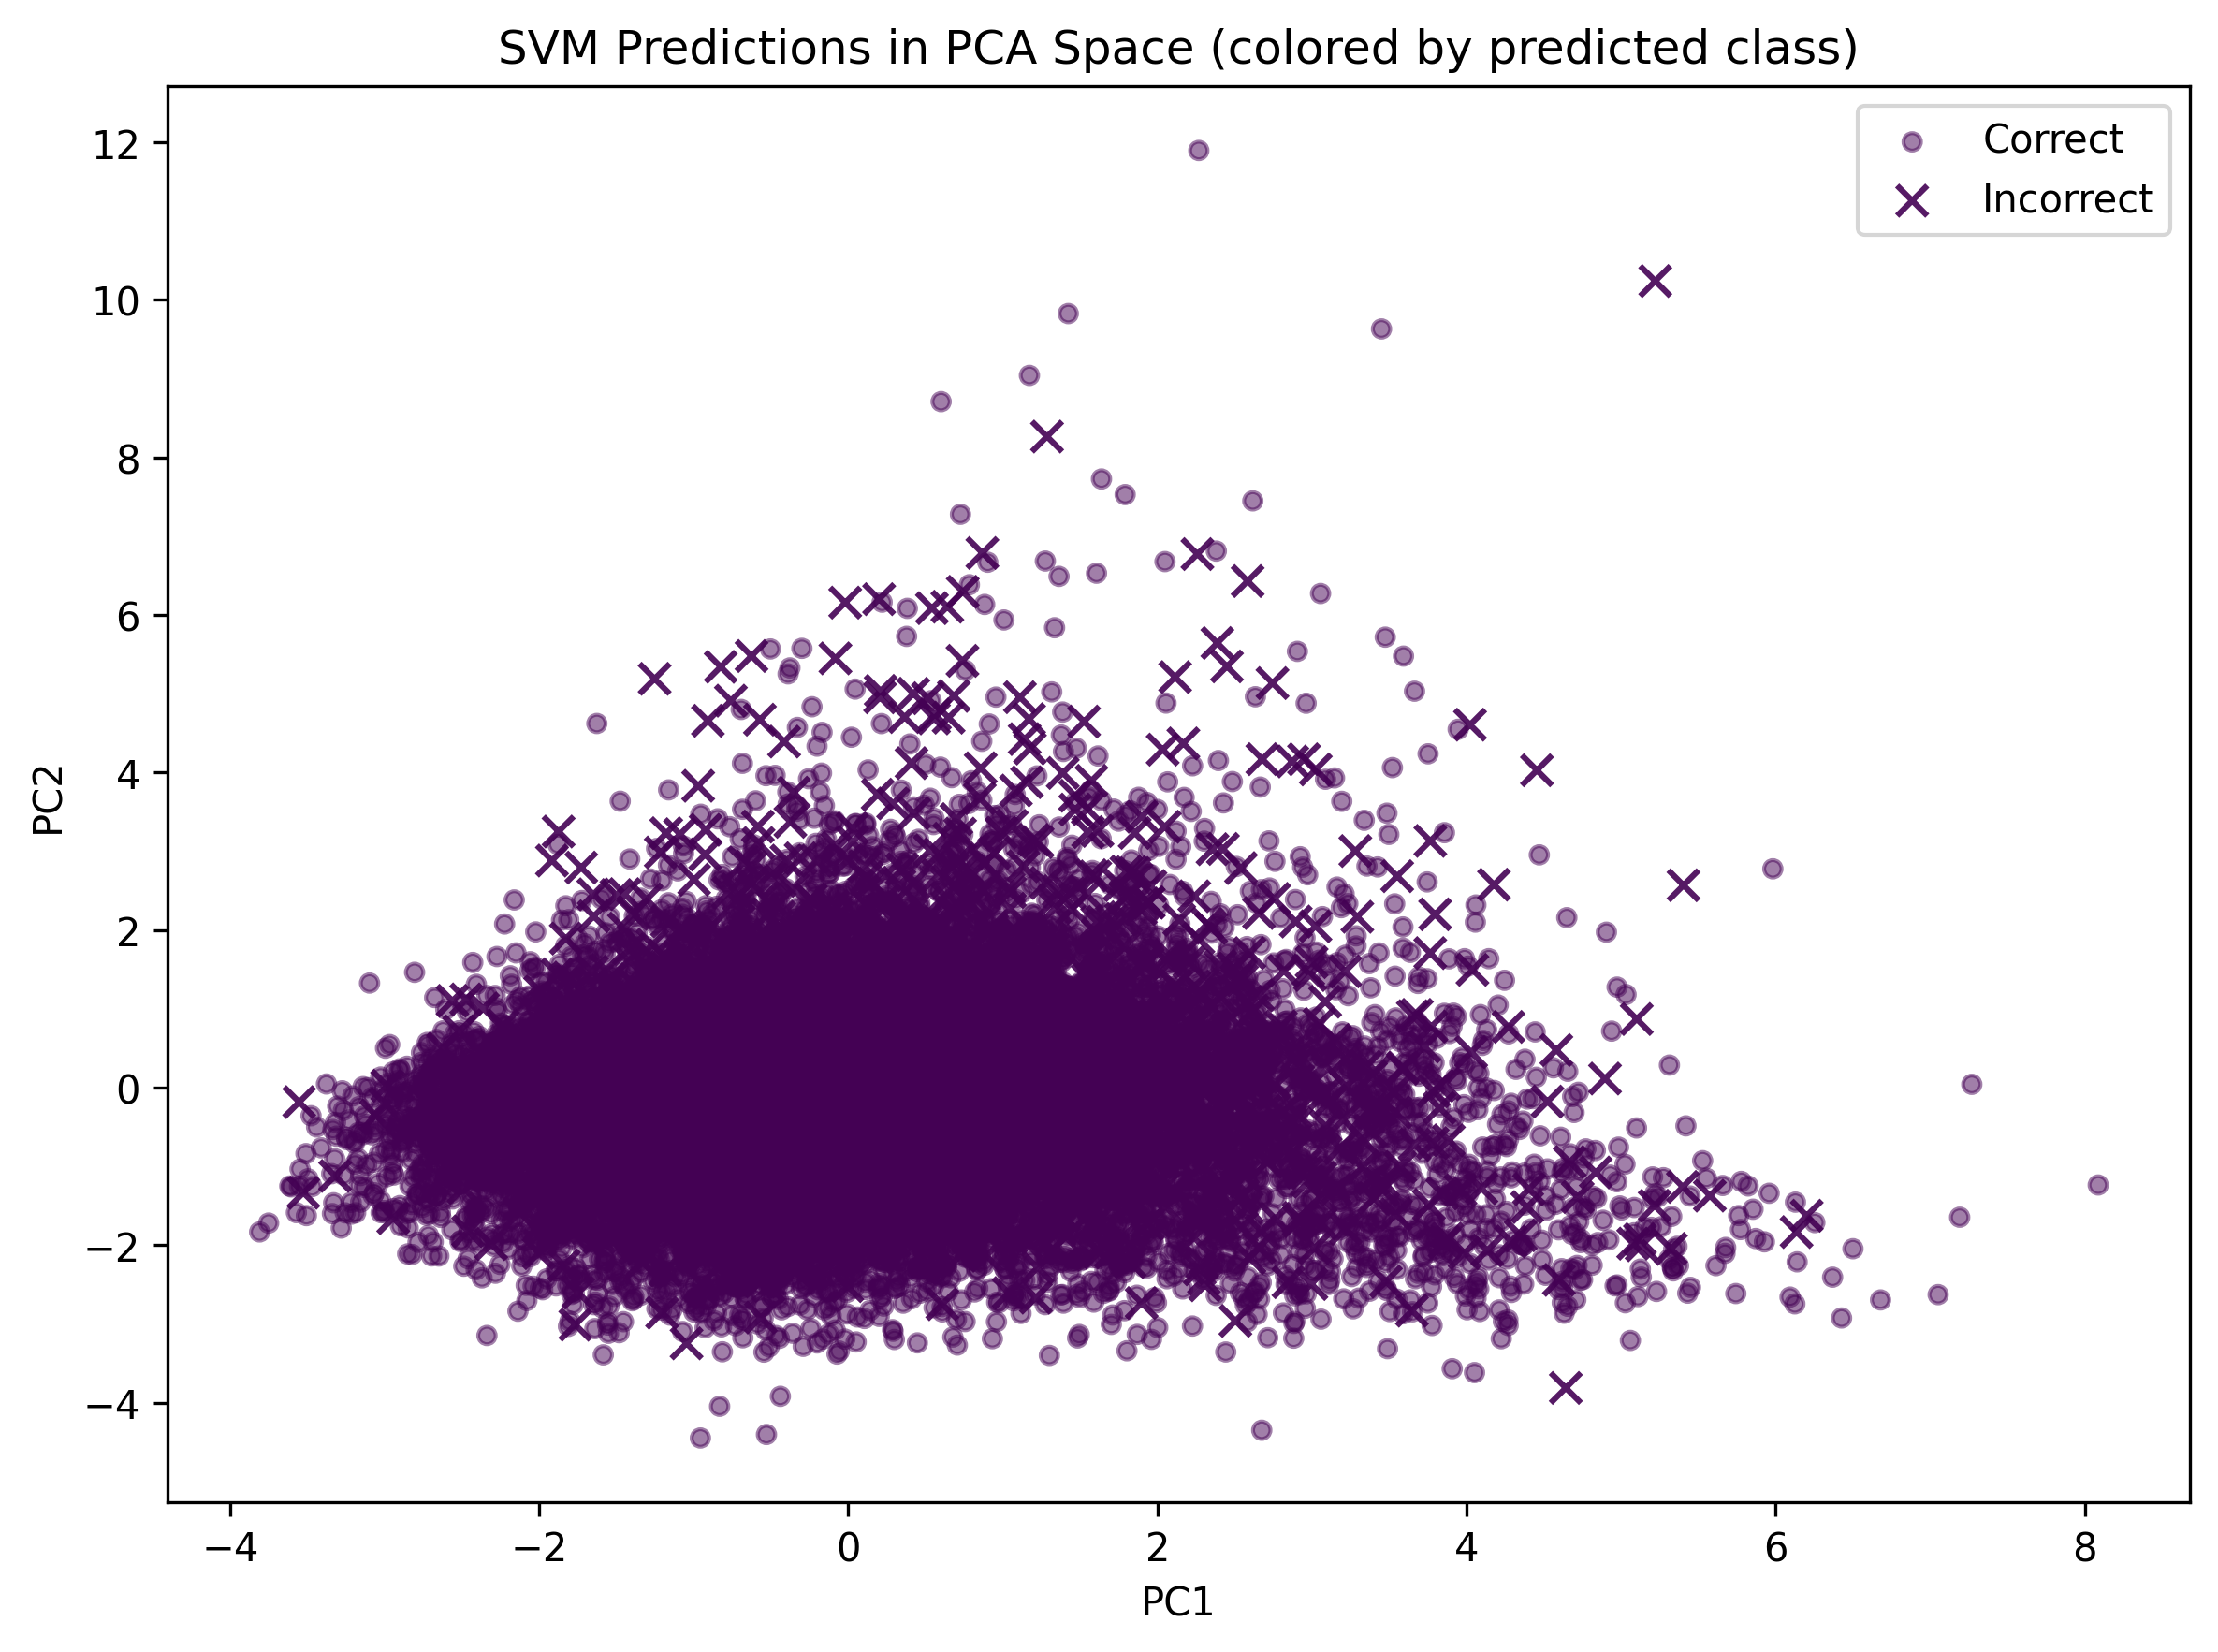

In [11]:

# pca_vis = PCA(n_components=2, random_state=42) <-- Actual code block
# X_vis = pca_vis.fit_transform(X_test)

# correct = (y_test == y_pred)

# plt.figure(figsize=(8, 6))
# plt.scatter(X_vis[correct, 0], X_vis[correct, 1],
            # c=y_pred[correct], cmap="viridis",
            # s=20, alpha=0.5, label="Correct")

# plt.scatter(X_vis[~correct, 0], X_vis[~correct, 1],
            # c=y_pred[~correct], cmap="viridis",
            # s=60, alpha=0.9,
            # marker="x", edgecolors="black", label="Incorrect")

# plt.title("SVM Predictions in PCA Space (colored by predicted class)")
# plt.xlabel("PC1"); plt.ylabel("PC2")
# plt.legend()
# plt.show()

print("PCA Prediction Scatter:")
display(Image(filename="svm_results/svm_pca_predictions.png"))

# **Interpretation & Discussion — SVM Classification**

## **Overall Performance**

The SVM classifier (RBF kernel with PCA-reduced features) achieved:

* **Accuracy:** 0.8884
* **Precision:** 0.7893
* **Recall:** 0.8884
* **F1-score:** 0.8359

These values indicate that the SVM performs very well on the overall dataset, achieving accuracy comparable to (or slightly higher than) the k-NN model. The high recall reflects that the model correctly identifies a large portion of the test samples, though precision is lower due to systematic misclassification patterns discussed below.

---

## **Confusion Matrix Insights**

The confusion matrix reveals a strong bias toward the **majority class ("No")**:

| True Label | Predicted No | Predicted >30 | Predicted <30 |
| ---------- | ------------ | ------------- | ------------- |
| **No**     | 18,083       | 0             | 0             |
| **>30**    | 2,271        | 0             | 0             |
| **<30**    | 0            | 0             | 0             |

Key observations:

### **1. The model predicts only the majority class ("No")**

Despite good global metrics, the model completely fails to identify:

* > 30 day readmissions
* <30 day readmissions

This happens because:

* The dataset is **highly imbalanced**, with “No” dominating.
* SVM attempts to maximize the margin between classes, but the minority classes have very few representative samples.
* After PCA, minority-class structure becomes even harder to separate.

### **2. High accuracy does not imply balanced performance**

The classifier achieves high accuracy **because the majority class dominates**, not because it learns all classes well.

In fact, minority-class recall is effectively **0%**.

This is a classic case where **overall accuracy masks poor minority-class performance**.

---

## **PCA Prediction Visualization Interpretation**

The PCA scatter plot shows:

### **1. Predictions form a dense, uniform cloud**

Since **all predictions are the same label**, the color information collapses into a single cluster.

### **2. Incorrect predictions appear scattered as large "X" markers**

The model makes errors across various PCA regions, but:

* All incorrect points correspond to >30 or <30 true cases
* All points plotted with "correct" markers are simply majority-class samples predicted as majority-class

### **3. PCA space shows no clear separation for minority classes**

This suggests:

* Minority classes share feature space with majority classes
* PCA (20 components) compresses differences further
* The RBF kernel cannot carve out boundaries for rare samples

---

## **Strengths of SVM in This Context**

* **Effective at learning the majority structure**, explaining the high accuracy and recall.
* **Stable under PCA compression**, performing well with only 20 components.
* **Nonlinear decision boundary** (RBF kernel) handles complex relationships better than k-NN in high-dimension.

---

## **Limitations and Failure Modes**

Despite strong global metrics, SVM exhibits **severe class imbalance failure**:

### **1. Zero predictions for minority classes**

This is the most significant limitation of the model.

### **2. PCA may obscure minority-class features**

Reducing dimensionality can compress the variance needed to distinguish rare patterns.

### **3. SVM’s margin maximization favors majority classes**

The classifier finds a wide margin around the dense majority cluster and effectively collapses minority boundaries.

---

## **Potential Improvements**

To address imbalance, future work could explore:

* **class_weight="balanced"** in SVM
* **oversampling techniques** (e.g., SMOTE)
* **undersampling the majority class**
* **different kernels or tuned hyperparameters**
* **increasing PCA components** (30–50 preserves more class-specific variance)

These methods aim to restore predictive power for >30 and <30 readmissions.

---

## **Conclusion**

The SVM classifier achieves **high overall performance** and demonstrates strong capability in modeling the majority class. However, like many models trained on highly imbalanced medical datasets, it struggles significantly with minority readmission categories.
The visualizations reinforce this: predictions cluster tightly around "No", and minority cases scatter as misclassifications.

Thus, while SVM provides a strong starting point for modeling general patient similarity and major trends, **it requires imbalance-handling techniques before it can be trusted for predicting early readmissions**.